In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import fileinput
import decimal
#from mpl_toolkits.axes_grid1.inset_locator import mark_inset, inset_axes, zoomed_inset_axes

In [2]:
def range_decimal(start, stop, step, stop_inclusive=False):
    """ The Python range() function, using decimals.  A decimal loop_value generator.

    Note: The decimal math (addition) defines the rounding.

    If the stop is None, then:
        stop = start
        start = 0 (zero)

    If the step is 0 (zero) or None, then:
        if (stop < start) then step = -1 (minus one)
        if (stop >= start) then step = 1 (one)

    Example:
        for index in range_decimal(0, 1.0, '.1', stop_inclusive=True):
            print(index)

    :param start: The loop start value
    :param stop: The loop stop value
    :param step: The loop step value
    :param stop_inclusive: Include the stop value in the loop's yield generator: False = excluded ; True = included
    :return: The loop generator's yield increment value (decimal)
    """
    try:
        # Input argument(s) error check
        zero = decimal.Decimal('0')

        if start is None:
            start = zero

        if not isinstance(start, decimal.Decimal):
            start = decimal.Decimal(f'{start}')

        if stop is None:
            stop = start
            start = zero

        if not isinstance(stop, decimal.Decimal):
            stop = decimal.Decimal(f'{stop}')

        if step is None:
            step = decimal.Decimal('-1' if stop < start else '1')

        if not isinstance(step, decimal.Decimal):
            step = decimal.Decimal(f'{step}')

        if step == zero:
            step = decimal.Decimal('-1' if stop < start else '1')

        # Check for valid loop conditions
        if start == stop or (start < stop
                             and step < zero) or (start > stop
                                                  and step > zero):
            return  # Not valid: no loop

        # Case: increment step ( > 0 )
        if step > zero:
            while start < stop:  # Yield the decimal loop points (stop value excluded)
                yield start
                start += step

        # Case: decrement step ( < 0 )
        else:
            while start > stop:  # Yield the decimal loop points (stop value excluded)
                yield start
                start += step

        # Yield the stop value (inclusive)
        if stop_inclusive:
            yield stop

    except (ValueError, decimal.DecimalException) as ex:
        raise ValueError(f'{__name__}.range_decimal() error: {ex}')

In [3]:
source_dir = "../outputs/gaussian/"

In [4]:
sigma_list = np.linspace(0.1,10,100)
tlist = np.linspace(-4, 4, 8000)

In [5]:
in_one_photon = np.loadtxt(source_dir+"population/input_one_photon_1.dat")
excited_atom = np.loadtxt(source_dir+"population/excited_atom_1.dat")
gs_atom = np.loadtxt(source_dir+"population/gs_atom_1.dat")

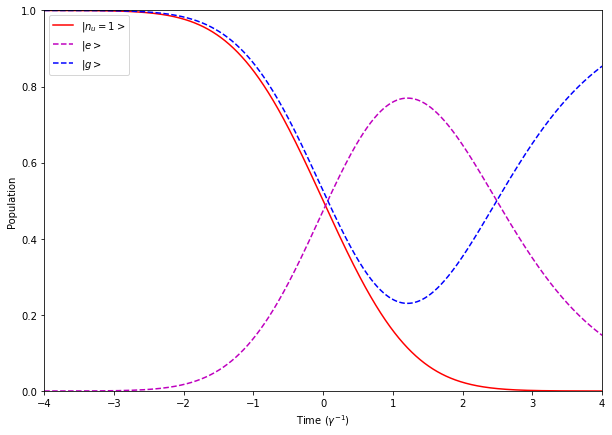

In [6]:
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(10)

ax.plot(tlist, in_one_photon, '-r', label='$|n_{u}=1>$')
ax.plot(tlist, excited_atom, '--m', label='$|e>$')
ax.plot(tlist, gs_atom, '--b', label='$|g>$')
ax.set_xlim(-4,4)
ax.set_xlabel('Time ($\gamma^{-1}$)')
ax.set_ylim(0,1)
ax.set_ylabel('Population')
ax.legend()

plt.show()

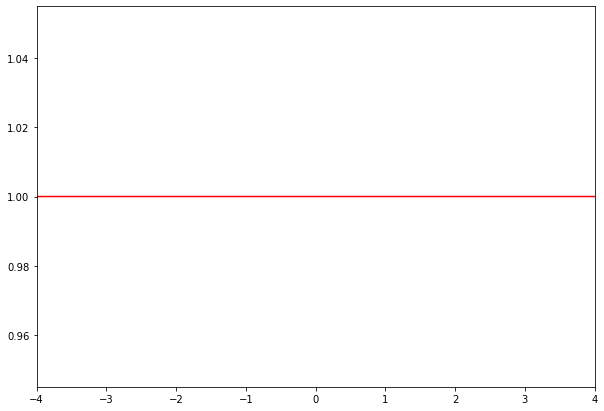

In [7]:
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(10)

ax.plot(tlist, excited_atom+gs_atom, '-r')
ax.set_xlim(-4,4)
#ax.set_ylim(0,1)


plt.show()

In [4]:
gas_pur = np.loadtxt(source_dir + "fixed_sigma/sigma_1.0/gaussian_purity_1.0.dat")
gas_erg = np.loadtxt(source_dir + "fixed_sigma/sigma_1.0/gaussian_ergotropy_1.0.dat")
gas_ene = np.loadtxt(source_dir + "fixed_sigma/sigma_1.0/gaussian_energy_1.0.dat")

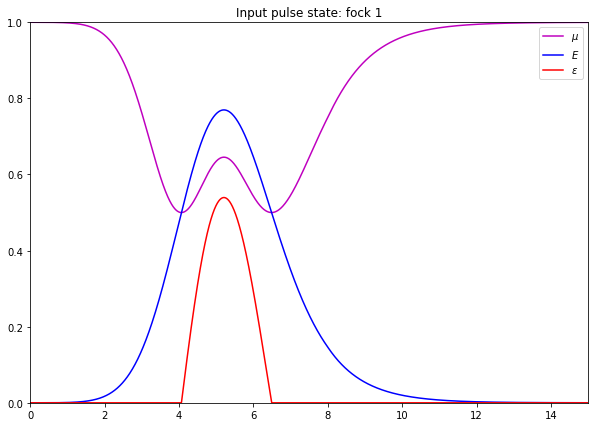

In [6]:
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(10)

ax.plot(gas_pur[:,0], gas_pur[:,1], '-m', label='$\mu$')
ax.plot(gas_ene[:,0], gas_ene[:,1], '-b', label='$E$')
ax.plot(gas_erg[:,0], gas_erg[:,1], '-r', label='$\epsilon$')

ax.set_xlim(0,15)
ax.set_ylim(0,1)

ax.set_title("Input pulse state: fock 1")

ax.legend()

plt.show()

In [7]:
squeezed_pur = np.loadtxt(source_dir + 
                          "fixed_sigma/squeezed_1/precision_0.001/sigma_1.0/purity_1.0.dat")
squeezed_erg = np.loadtxt(source_dir + 
                          "fixed_sigma/squeezed_1/precision_0.001/sigma_1.0/ergotropy_1.0.dat")
squeezed_ene = np.loadtxt(source_dir + 
                          "fixed_sigma/squeezed_1/precision_0.001/sigma_1.0/energy_1.0.dat")

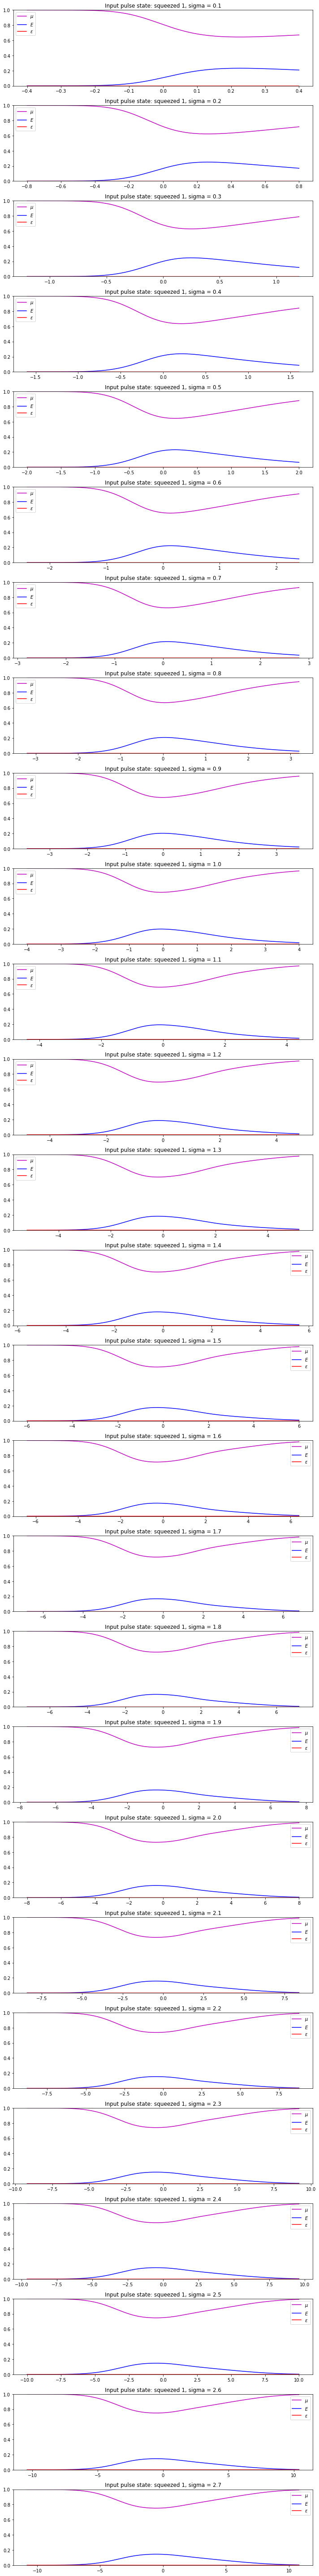

In [24]:
fig, ax = plt.subplots(27, figsize=(10,80))
#fig.set_figheight(10)
#fig.set_figwidth(40)

for i, sigma in zip(range(0,27,1), range_decimal(0.1,2.7,0.1,stop_inclusive=True)):
    squeezed_pur = np.loadtxt(source_dir + 
                          "fixed_sigma/squeezed_1/precision_0.001/sigma_" + 
                              str(sigma) + "/purity_" + str(sigma) + ".dat")
    squeezed_erg = np.loadtxt(source_dir + 
                          "fixed_sigma/squeezed_1/precision_0.001/sigma_" + 
                              str(sigma) + "/ergotropy_" + str(sigma) + ".dat")
    squeezed_ene = np.loadtxt(source_dir + 
                          "fixed_sigma/squeezed_1/precision_0.001/sigma_" + 
                              str(sigma) + "/energy_" + str(sigma) + ".dat")
    ax[i].plot(squeezed_pur[:,0], squeezed_pur[:,1], '-m', label='$\mu$')
    ax[i].plot(squeezed_ene[:,0], squeezed_ene[:,1], '-b', label='$E$')
    ax[i].plot(squeezed_erg[:,0], squeezed_erg[:,1], '-r', label='$\epsilon$')

    #ax.set_xlim(0,15)
    ax[i].set_ylim(0,1)

    ax[i].set_title("Input pulse state: squeezed 1, sigma = " + str(sigma))

    ax[i].legend()

plt.tight_layout()
plt.show()

In [10]:
source_dir = "../outputs/gaussian/fixed_sigma/"

In [11]:
#fig, axes = plt.subplots(10,figsize=(10, 40))

#for i in range(1,11):
#    for sigma in range_decimal(0.1,10.0,0.1,stop_inclusive=True):
#        erg = np.loadtxt(source_dir+"fock_"+str(i)+"/precision_0.001/sigma_"+str(sigma)+
#                        "/ergotropy_"+str(sigma)+".dat")
#        axes[i].plot(erg[:,0],erg[:,1])
        
#plt.tight_layout()
#plt.show()

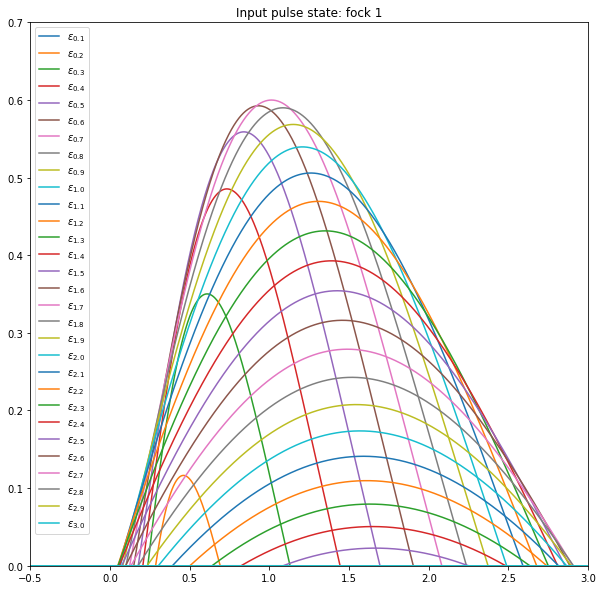

In [12]:
fig, axes = plt.subplots(figsize=(10, 10))

for sigma in range_decimal(0.1,3.0,0.1,stop_inclusive=True):
    erg = np.loadtxt(source_dir+"fock_1/precision_0.001/sigma_"+str(sigma)+
                "/ergotropy_"+str(sigma)+".dat")
    axes.plot(erg[:,0],erg[:,1], label='$\epsilon_{'+str(sigma)+'}$')
    axes.set_ylim(0,0.7)
    axes.set_xlim(-0.5,3)
    axes.set_title("Input pulse state: fock 1")
    axes.legend()

#plt.tight_layout()
plt.show()

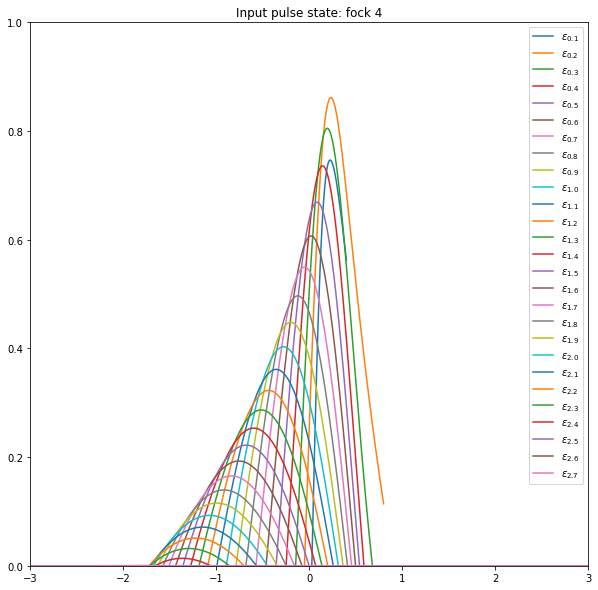

In [13]:
fig, axes = plt.subplots(figsize=(10, 10))

for sigma in range_decimal(0.1,2.7,0.1,stop_inclusive=True):
    erg = np.loadtxt(source_dir+"fock_4/precision_0.001/sigma_"+str(sigma)+
                "/ergotropy_"+str(sigma)+".dat")
    axes.plot(erg[:,0],erg[:,1], label='$\epsilon_{'+str(sigma)+'}$')
    axes.set_ylim(0,1)
    axes.set_xlim(-3,3)
    axes.set_title("Input pulse state: fock 4")
    axes.legend()

#plt.tight_layout()
plt.show()

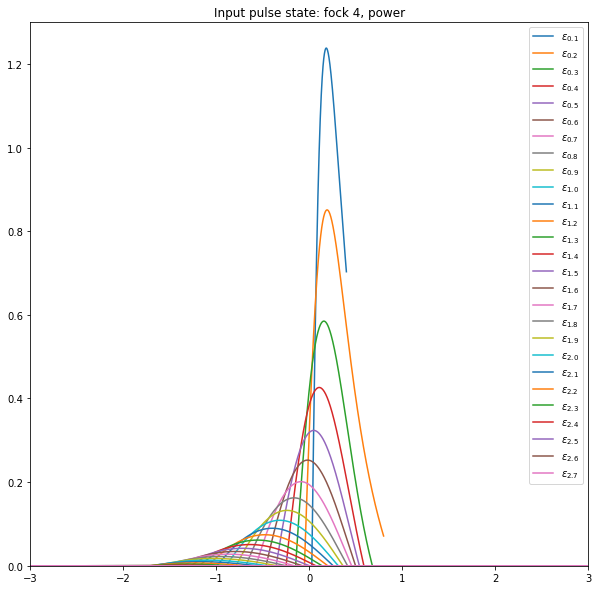

In [14]:
fig, axes = plt.subplots(figsize=(10, 10))

for sigma in range_decimal(0.1,2.7,0.1,stop_inclusive=True):
    erg = np.loadtxt(source_dir+"fock_4/precision_0.001/sigma_"+str(sigma)+
                "/power_"+str(sigma)+".dat")
    axes.plot(erg[:,0],erg[:,1], label='$\epsilon_{'+str(sigma)+'}$')
    axes.set_ylim(0)
    axes.set_xlim(-3,3)
    axes.set_title("Input pulse state: fock 4, power")
    axes.legend()

#plt.tight_layout()
plt.show()

In [15]:
source_dir = "../outputs/gaussian/max/"

In [16]:
max_erg_fock = [np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "fock_" + str(i) + "/precision_0.001/ergotropy*.dat")))) for i in range(1,11)]
max_ene_fock = [np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "fock_" + str(i) + "/precision_0.001/energy*.dat")))) for i in range(1,11)]
max_pow_fock = [np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "fock_" + str(i) + "/precision_0.001/power*.dat")))) for i in range(1,11)]

In [17]:
def plot_max(x, max_erg, max_ene, max_pow, title, ax=None):
    if ax is None:
        ax = plt.gca()
    ax.plot(x, max_erg, '-r', label='$\epsilon_{max}$')
    ax.plot(x, max_ene, '-b', label='$E_{max}$')
    ax.plot(x, max_pow, '-m', label='$P_{max}$')
    
    ax.set_xlim(x[0],x[-1])
    ax.set_xlabel('$\sigma$ ($\gamma^{-1}$)')
    ax.set_ylim(0)
    
    ax.set_title('Input pulse state: ' + title)
    ax.legend()
    
    return ax

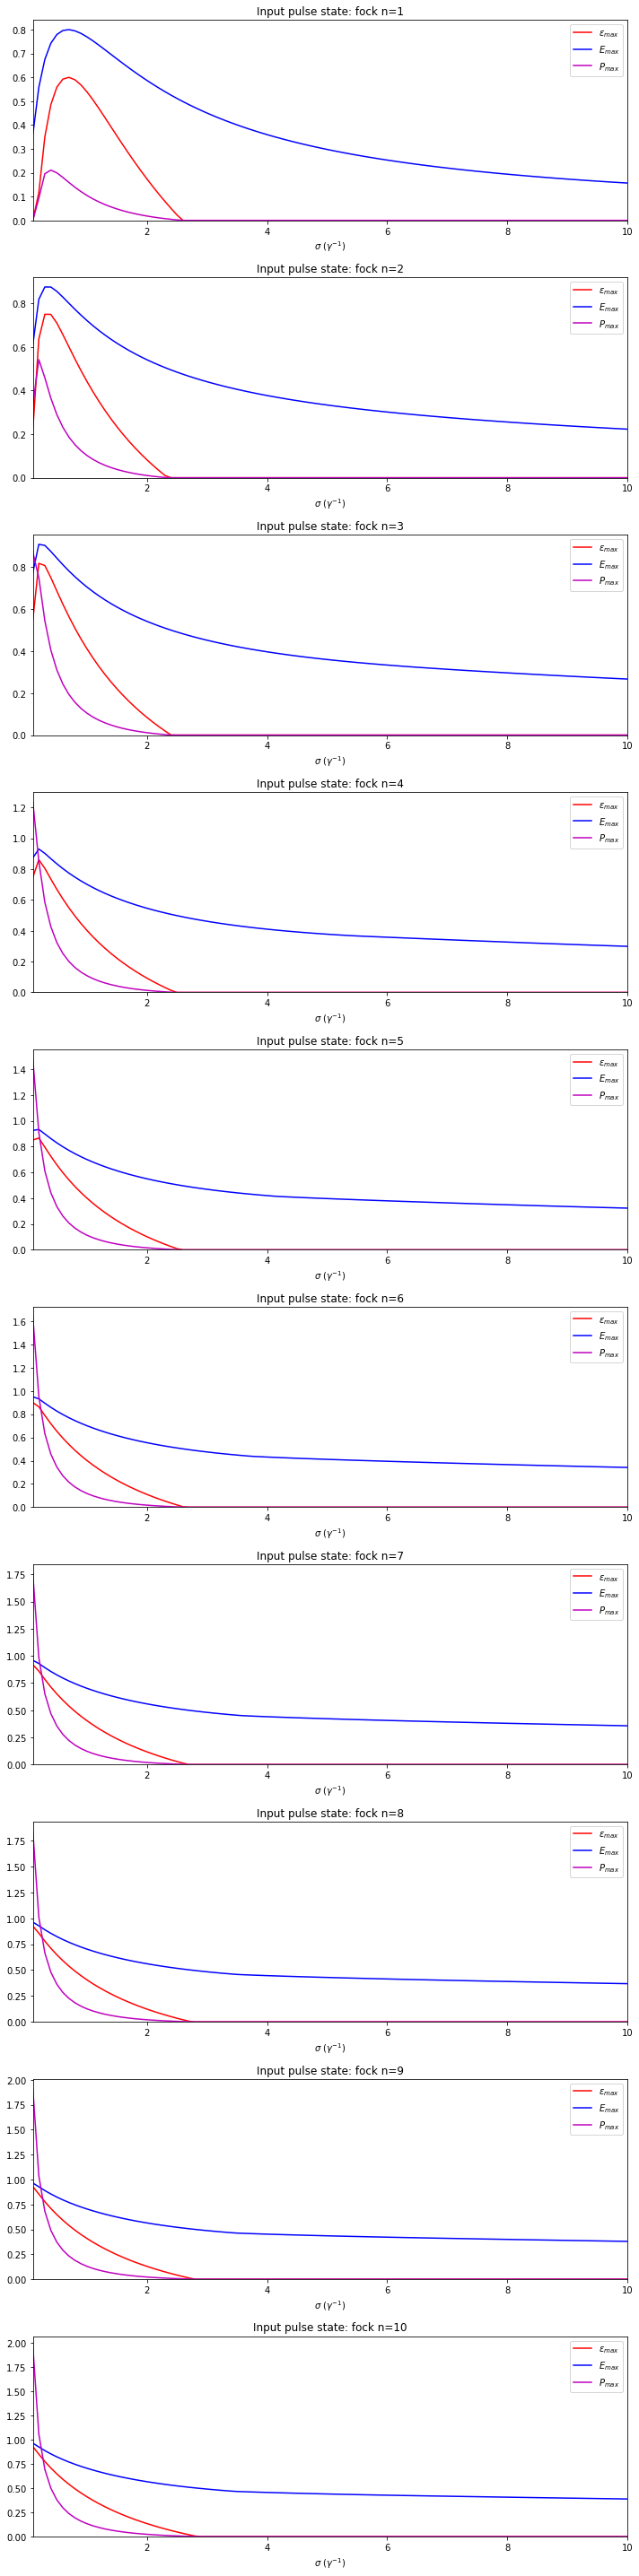

In [18]:
fig, axes = plt.subplots(len(max_erg_fock),figsize=(10, 40))
#fig.set_figheight(7)
#fig.set_figwidth(10)

for i in range( len(max_erg_fock) ):
    plot_max(sigma_list, max_erg_fock[i], max_ene_fock[i], max_pow_fock[i], title='fock n='+str(i+1), ax=axes[i])

plt.tight_layout()
plt.show()

In [19]:
max_erg_fock4_00005 = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "fock_4/precision_0.0005/ergotropy*.dat"))))
max_ene_fock4_00005 = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "fock_4/precision_0.0005/energy*.dat"))))
max_pow_fock4_00005 = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "fock_4/precision_0.0005/power*.dat"))))

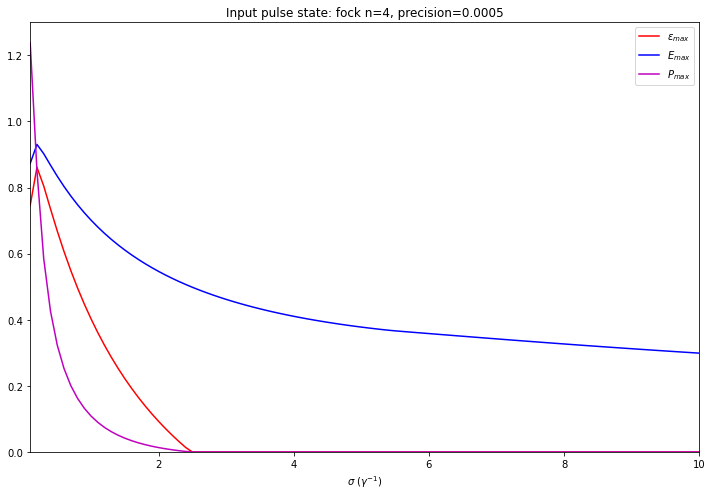

In [20]:
fig, axes = plt.subplots(1,figsize=(10, 7))

plot_max(sigma_list, max_erg_fock4_00005, max_ene_fock4_00005, max_pow_fock4_00005, 
         title='fock n=4, precision=0.0005', 
         ax=axes)

plt.tight_layout()
plt.show()

In [21]:
max_erg_fock4_000025 = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "fock_4/precision_0.00025/ergotropy*.dat"))))
max_ene_fock4_000025 = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "fock_4/precision_0.00025/energy*.dat"))))
max_pow_fock4_000025 = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "fock_4/precision_0.00025/power*.dat"))))

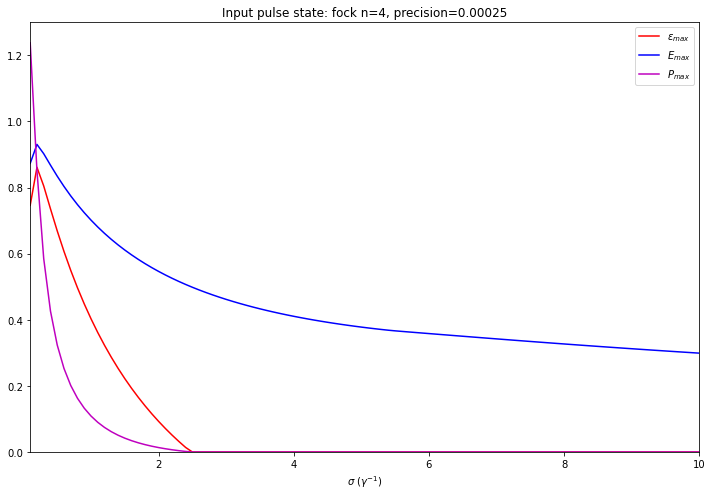

In [22]:
fig, axes = plt.subplots(1,figsize=(10, 7))

plot_max(sigma_list, max_erg_fock4_000025, max_ene_fock4_000025, max_pow_fock4_000025, 
         title='fock n=4, precision=0.00025', 
         ax=axes)

plt.tight_layout()
plt.show()

In [23]:
max_erg_fock4_00005-max_erg_fock[3]

array([ 2.21247450e-07,  1.50939696e-06,  1.34545157e-06, -8.38421729e-08,
        4.77216363e-07,  4.71666226e-07,  1.27138795e-07,  2.20849496e-07,
       -8.15353673e-10,  2.71493765e-08, -2.99103990e-08, -2.02558089e-08,
        1.03813342e-07,  1.16713142e-07,  4.49216184e-08, -2.49689757e-08,
        5.32126926e-08,  6.56163471e-08,  2.81467183e-09,  1.99566213e-08,
        4.36472791e-09, -1.04328554e-08,  3.55729238e-08,  2.03278030e-08,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [24]:
max_erg_fock4_000025-max_erg_fock[3]

array([ 4.04519533e-07,  1.93177101e-06,  1.52625896e-06,  3.93800713e-08,
        5.26337419e-07,  5.52714039e-07,  2.34134651e-07,  2.42271629e-07,
        2.22674252e-08,  3.87804743e-08,  2.38046699e-09,  4.64426431e-09,
        1.26693796e-07,  1.17072376e-07,  3.71844034e-08, -6.36851716e-09,
        5.59405266e-08,  7.76102979e-08,  3.24709770e-09,  2.06081217e-08,
        7.12757509e-09, -2.59281874e-09,  4.23652646e-08,  2.49918847e-08,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [25]:
max_ene_fock4_000025-max_ene_fock[3]

array([ 2.02259766e-07,  9.65885507e-07,  7.63129480e-07,  1.96900357e-08,
        2.63168710e-07,  2.76357020e-07,  1.17067326e-07,  1.21135814e-07,
        1.11337126e-08,  1.93902371e-08,  1.19023347e-09,  2.32213215e-09,
        6.33468982e-08,  5.85361882e-08,  1.85922017e-08, -3.18425863e-09,
        2.79702633e-08,  3.88051490e-08,  1.62354885e-09,  1.03040608e-08,
        3.56378749e-09, -1.29640942e-09,  2.11826323e-08,  1.24959424e-08,
        1.38258485e-08,  1.13942613e-08,  6.31109209e-09, -1.56326341e-10,
        5.90602678e-10,  3.21000820e-09,  3.30539041e-10,  1.22989019e-09,
        2.25917257e-09, -1.44646461e-10, -8.67058647e-11,  1.25776783e-09,
       -9.00631236e-11, -5.23178167e-11,  1.91735527e-09, -6.52287668e-11,
        1.39752693e-09, -1.25441546e-10,  1.66810216e-09,  5.06204911e-10,
       -5.01714781e-11,  3.02419201e-12,  4.26869873e-10,  1.16919779e-09,
        1.91937410e-10,  7.77893083e-10,  1.24088517e-11,  2.57341537e-10,
        1.00200293e-10,  

In [26]:
max_pow_fock4_000025-max_pow_fock[3]

array([ 2.70329111e-06,  9.75138501e-07,  9.39747176e-08,  2.72202657e-08,
        3.55170409e-07,  2.53498961e-07,  1.28707777e-07,  2.19580212e-08,
        3.69603992e-08,  6.00198427e-09,  2.48854104e-09,  7.68456576e-10,
        1.48172492e-09,  1.90223610e-09, -8.60668384e-10,  1.79308285e-08,
        4.02414775e-10,  8.23847419e-09,  4.31594054e-09,  9.10832449e-09,
       -4.09893956e-10,  4.26155161e-09,  1.87188940e-09,  2.07821207e-09,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [27]:
max_erg_fock5_00005 = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "fock_5/precision_0.0005/ergotropy*.dat"))))
max_ene_fock5_00005 = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "fock_5/precision_0.0005/energy*.dat"))))
max_pow_fock5_00005 = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "fock_5/precision_0.0005/power*.dat"))))

In [28]:
max_erg_fock5_000025 = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "fock_5/precision_0.00025/ergotropy*.dat"))))
max_ene_fock5_000025 = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "fock_5/precision_0.00025/energy*.dat"))))
max_pow_fock5_000025 = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "fock_5/precision_0.00025/power*.dat"))))

In [29]:
max_erg_fock5_00005-max_erg_fock[4]

array([-3.65123224e-07,  2.90735855e-06, -2.39900375e-07, -3.45852297e-07,
        5.47193515e-07, -1.74680919e-07,  5.09281118e-08, -7.02740479e-08,
        2.91151093e-07,  7.97690687e-08,  1.66861136e-07, -5.71983498e-08,
       -4.69846637e-08,  8.51100398e-08,  3.76386251e-08, -2.94162955e-08,
       -8.48142712e-09,  4.28774902e-08, -8.07189404e-09,  1.50961954e-09,
        2.47945356e-08, -3.85620702e-09,  3.64886604e-09,  4.28136249e-10,
       -9.13600678e-09,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [30]:
max_ene_fock5_00005-max_ene_fock[4]

array([-1.82561612e-07,  1.45367928e-06, -1.19950187e-07, -1.72926149e-07,
        2.73596757e-07, -8.73404594e-08,  2.54640559e-08, -3.51370240e-08,
        1.45575546e-07,  3.98845343e-08,  8.34305680e-08, -2.85991749e-08,
       -2.34923319e-08,  4.25550200e-08,  1.88193126e-08, -1.47081477e-08,
       -4.24071356e-09,  2.14387451e-08, -4.03594702e-09,  7.54809770e-10,
        1.23972678e-08, -1.92810357e-09,  1.82443305e-09,  2.14068097e-10,
       -4.56800342e-09, -2.60786948e-09, -2.15025509e-09,  5.82514759e-10,
        7.30452487e-09, -2.25583829e-10,  1.04458214e-09,  5.64897262e-09,
        3.36613204e-09,  5.17107551e-09,  1.18571042e-09,  4.12424428e-10,
       -1.15020632e-09,  5.68261493e-10, -3.27004701e-10,  5.21488852e-10,
        1.28636857e-09, -4.19705104e-10, -3.90335930e-10, -2.79292145e-11,
        6.24022278e-10, -2.49449850e-10, -3.04366088e-10,  5.61767077e-10,
       -6.97442659e-11,  5.48752987e-10, -2.38641329e-11, -3.52954888e-11,
        3.91288557e-10, -

In [31]:
max_pow_fock5_00005-max_pow_fock[4]

array([-1.33300451e-06,  1.33247915e-06,  4.31548060e-07, -2.61403832e-07,
        4.01179437e-08, -8.41358135e-08, -1.96793587e-08,  3.22785923e-08,
        2.19546655e-08,  2.36751606e-08,  3.13575854e-08, -1.13609455e-08,
        7.77534981e-10,  7.14077068e-10,  1.06944316e-08,  1.99004177e-09,
        1.11195606e-08, -8.13178587e-11, -1.34136925e-09, -1.63089546e-09,
        3.55732427e-09,  1.40075166e-09, -5.80271497e-10, -9.41227017e-10,
        2.19453381e-09,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [32]:
max_erg_fock5_000025-max_erg_fock[4]

array([ 1.89940748e-08,  3.40809893e-06,  4.75660858e-08, -5.37951004e-08,
        5.74229170e-07, -2.70090678e-08,  2.35494206e-07,  1.45340873e-09,
        3.64573936e-07,  7.60554714e-08,  2.05211492e-07, -1.27038267e-08,
       -7.01199265e-09,  1.08780977e-07,  3.57386276e-08, -5.60004221e-09,
        1.60596286e-09,  5.16137221e-08,  3.28271771e-09,  6.71358102e-09,
        2.10728437e-08,  8.51344661e-10,  6.25941093e-09,  3.71262665e-09,
       -1.35685346e-09,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [33]:
max_ene_fock5_000025-max_ene_fock[4]

array([ 9.49703727e-09,  1.70404947e-06,  2.37830429e-08, -2.68975502e-08,
        2.87114585e-07, -1.35045338e-08,  1.17747103e-07,  7.26704363e-10,
        1.82286968e-07,  3.80277357e-08,  1.02605746e-07, -6.35191333e-09,
       -3.50599638e-09,  5.43904883e-08,  1.78693138e-08, -2.80002110e-09,
        8.02981459e-10,  2.58068611e-08,  1.64135883e-09,  3.35679051e-09,
        1.05364218e-08,  4.25672275e-10,  3.12970549e-09,  1.85631333e-09,
       -6.78426759e-10, -1.52581003e-10, -2.06948125e-10,  5.46734269e-10,
        7.82748594e-09,  2.99392178e-10,  1.43174267e-09,  6.26276647e-09,
        4.57592381e-09,  6.31056668e-09,  1.01300113e-09,  3.06432935e-10,
       -1.67185155e-10,  7.60229601e-10,  8.09116663e-11,  3.54551777e-10,
        1.19728483e-09, -6.43837761e-11, -6.44167497e-11,  8.01241851e-11,
        6.80612400e-10, -4.21925828e-11, -7.26984029e-11,  6.50541010e-10,
        2.65120148e-11,  6.32984720e-10,  9.47910084e-11,  2.89246405e-11,
        4.43070025e-10, -

In [34]:
max_pow_fock5_000025-max_pow_fock[4]

array([ 2.03775741e-07,  1.18635007e-06,  3.90003109e-07, -6.19566791e-08,
        6.51752275e-08, -1.35463301e-08,  5.16427399e-08,  3.34605131e-08,
        1.50714642e-08,  2.00735669e-08,  3.56603863e-08, -1.29975747e-09,
        4.15745276e-09,  4.18547468e-10,  9.13451309e-09,  1.52085796e-09,
        1.16414884e-08,  1.21604543e-09,  5.57092778e-10, -1.84034810e-10,
        4.15300259e-09,  1.52329975e-09,  6.05319215e-11, -7.65352530e-11,
        2.69769686e-09,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [35]:
max_erg_coherent = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "coherent_1/precision_0.001/ergotropy*.dat"))))
max_ene_coherent = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "coherent_1/precision_0.001/energy*.dat"))))
max_pow_coherent = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "coherent_1/precision_0.001/power*.dat"))))

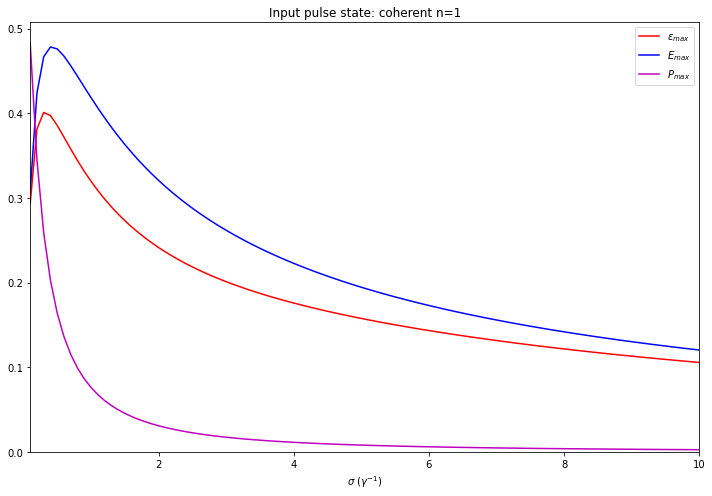

In [36]:
fig, axes = plt.subplots(1,figsize=(10, 7))

plot_max(sigma_list, max_erg=max_erg_coherent, max_ene=max_ene_coherent, max_pow=max_pow_coherent, 
         title='coherent n=1', ax=axes)

plt.tight_layout()
plt.show()

In [37]:
max_erg_squeezed_r = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "squeezed_1/ergotropy*.dat"))))
max_ene_squeezed_r = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "squeezed_1/energy*.dat"))))
max_pow_squeezed_r = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "squeezed_1/power*.dat"))))

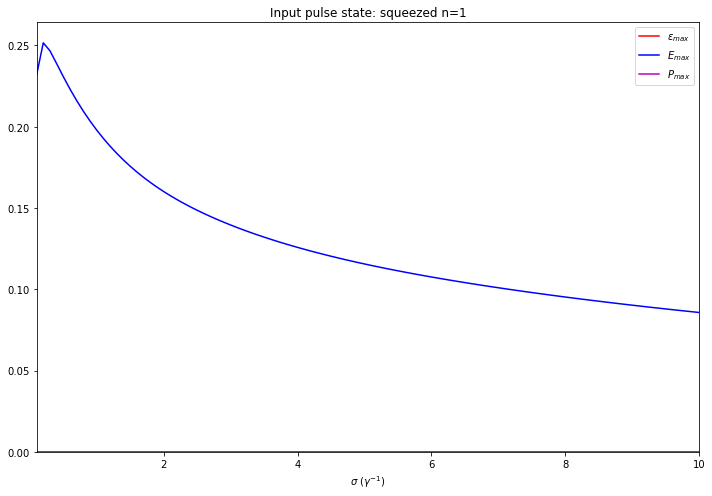

In [38]:
fig, axes = plt.subplots(1,figsize=(10, 7))

plot_max(sigma_list, max_erg=max_erg_squeezed_r, max_ene=max_ene_squeezed_r, max_pow=max_pow_squeezed_r, 
         title='squeezed n=1', ax=axes)

plt.tight_layout()
plt.show()

In [39]:
max_erg_squeezed_mr = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "squeezed_1/precision_0.001/ergotropy*.dat"))))
max_ene_squeezed_mr = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "squeezed_1/precision_0.001/energy*.dat"))))
max_pow_squeezed_mr = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "squeezed_1/precision_0.001/power*.dat"))))

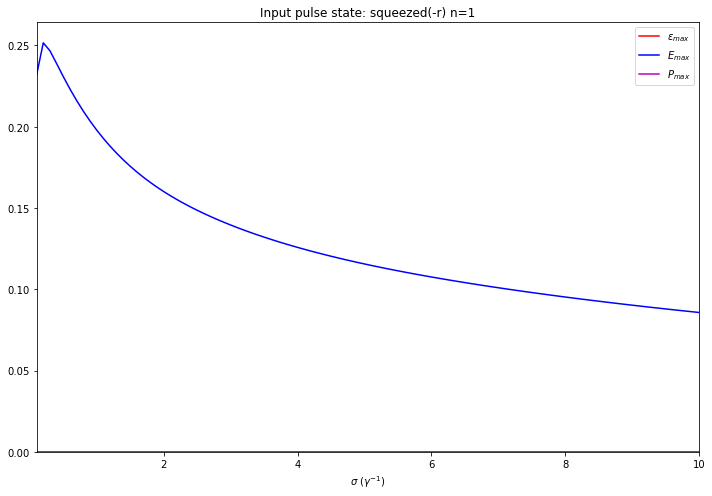

In [40]:
fig, axes = plt.subplots(1,figsize=(10, 7))

plot_max(sigma_list, max_erg=max_erg_squeezed_mr, max_ene=max_ene_squeezed_mr, max_pow=max_pow_squeezed_mr, 
         title='squeezed(-r) n=1', ax=axes)

plt.tight_layout()
plt.show()

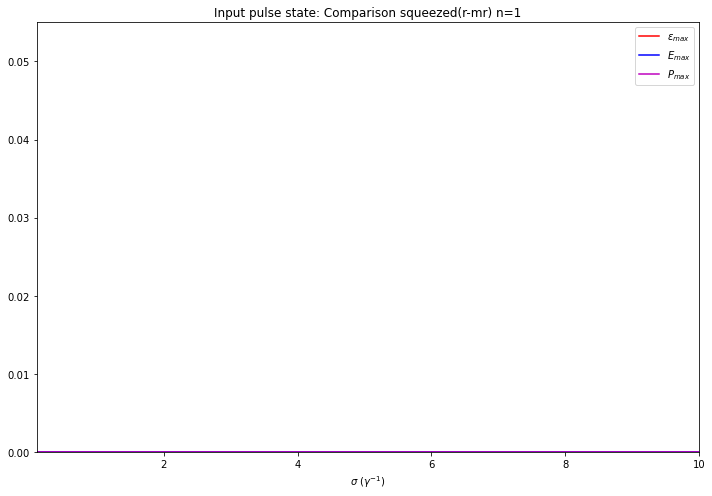

In [41]:
fig, axes = plt.subplots(1,figsize=(10, 7))

plot_max(sigma_list, max_erg=max_erg_squeezed_r-max_erg_squeezed_mr, 
         max_ene=max_ene_squeezed_r-max_ene_squeezed_mr, max_pow=max_pow_squeezed_r-max_pow_squeezed_mr, 
         title='Comparison squeezed(r-mr) n=1', ax=axes)

plt.tight_layout()
plt.show()

In [42]:
def plot_max_comparison(x, max_q, title, ax=None):
    if ax is None:
        ax = plt.gca()
    #print(len(max_q))
    for i in range( len(max_q) ):
        ax.plot(x, max_q[i], label='$\epsilon_{max}^{'+str(i+1)+'}$')
    
    #ax.set_xlim(x[0],x[-1])
    ax.set_xlim(x[0],3)
    ax.set_xlabel('$\sigma$ ($\gamma^{-1}$)')
    ax.set_ylim(0)
    
    ax.set_title(title + ' comparison')
    ax.legend()
    
    return ax

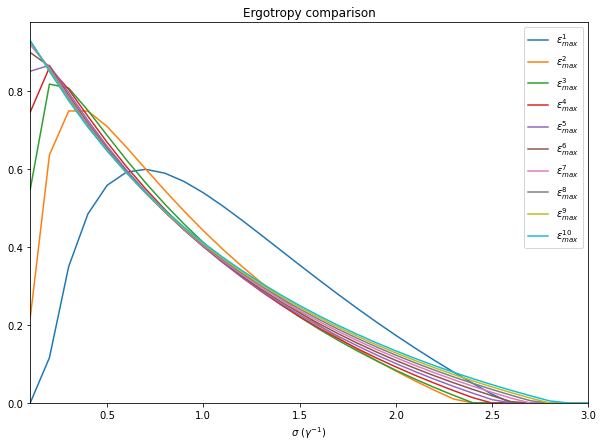

In [43]:
fig, axes = plt.subplots(1,figsize=(10, 7))

plot_max_comparison(sigma_list, max_erg_fock, 'Ergotropy', ax=axes)

plt.show()